In [8]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
from tqdm import tqdm
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.stats import laplace, bernoulli
from sklearn.metrics import pairwise_kernels
import scipy.stats as st
from kpe import kernel_two_sample_test_reweight
from dr_kpe import xMMD2dr_cross_fit, xMMD2dr

In [2]:
# from environment import GaussianPolicy, outcome_model, EstimatedLoggingPolicy

# beta = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
# gamma = 1.0

# w0 = np.random.randn(len(beta))
# w = np.random.randn(len(beta))
# w_prime = np.random.randn(len(beta))

# sample_sizes = [50, 100, 200, 250, 300, 350]
# num_experiments = 200

# all_results = []

# # Scenario i) No Treatment Effect
# logging_pi = GaussianPolicy(w0)
# pi = GaussianPolicy(w)
# pi_prime = GaussianPolicy(w, scale=3)

In [3]:
# ns = 200
# X = np.random.randn(ns, len(beta))
# X_prime = np.random.randn(ns, len(beta))

# logging_T = logging_pi.sample_treatments(X)
# logging_propensities = logging_pi.get_propensities(X, logging_T)
# logging_Y = outcome_model(X, logging_T, beta, gamma)

In [4]:
# m = 100
# n = 100

# # pi_propensities = pi.get_propensities(X[:m], logging_T[:m])
# # pi_prime_propensities = pi_prime.get_propensities(X[m:], logging_T[m:])

# estimate_logging_propensities = EstimatedLoggingPolicy(X, logging_T).get_propensities(X, logging_T)

# # w = np.concatenate([pi_propensities, pi_prime_propensities])[:, np.newaxis]/estimate_logging_propensities[:, np.newaxis]

In [5]:
# Y = logging_Y[:,np.newaxis]
# w_pi = pi.get_propensities(X, logging_T)[:, np.newaxis]/estimate_logging_propensities[:, np.newaxis]
# w_pi_prime = pi_prime.get_propensities(X, logging_T)[:, np.newaxis]/estimate_logging_propensities[:, np.newaxis]
# mmd2u, mmd2u_null, p_value = kernel_two_sample_test_reweight(Y, w_pi, w_pi_prime, kernel_function='linear')


In [6]:
# p_value

In [7]:
# from environment import make_scenario, generate_ope_data
# X, pi_log, pi, pi_prime, _, _ = make_scenario("II", d=5, seed=21)
# X = X[:ns]
# data = generate_ope_data(X, pi_log, pi, pi_prime, beta, gamma)

# Y = data["Y"].reshape(-1, 1)
# T = data["T"]
# w_pi = data["w_pi"]
# w_pi_prime = data["w_pi_prime"]
# pi_samples = data["pi_samples"]
# pi_prime_samples = data["pi_prime_samples"]

# try:
#     sigma2 = np.median(pairwise_distances(Y, Y)) ** 2
#     gamma_k = 1.0 / sigma2
# except:
#     gamma_k = None

# t0 = time.time()

# stat, _, pval = kernel_two_sample_test_reweight(
#     Y, w_pi, w_pi_prime,
#     kernel_function="linear",
#     iterations=10000,
#     random_state=21
# )
# pval

In [8]:
# w_pi

In [9]:

# m = n//2
# w_pi = w_pi[:m]
# w_pi_prime = w_pi_prime[m:]
# m = len(w_pi)
# # n = len(w_pi_prime)
# # Y_concat = np.vstack([Y, Y])  # Duplicate Y, keep weights distinct
# K = pairwise_kernels(Y, metric='linear')
# K_pi = np.outer(w_pi, w_pi) * K[:m, :m]
# K_pi_prime = np.outer(w_pi_prime, w_pi_prime) * K[m:, m:]
# K_cross = np.outer(w_pi, w_pi_prime) * K[:m, m:]
# mmd = 1.0 / (m * (m - 1.0)) * (K_pi.sum() - K_pi.diagonal().sum()) + 1.0 / (n * (n - 1.0)) * (K_pi_prime.sum() - K_pi_prime.diagonal().sum()) - 2.0 / (m * n) * K_cross.sum()

# def MMD2u_reweight(K, w_pi, w_pi_prime):
#     """The MMD^2_u unbiased statistic."""

#     w_pi = w_pi.reshape(-1, 1)
#     w_pi_prime = w_pi_prime.reshape(-1, 1)
#     m = len(w_pi)
#     n = len(w_pi_prime)
#     K_pi = np.outer(w_pi, w_pi) * K[:m, :m]
#     K_pi_prime = np.outer(w_pi_prime, w_pi_prime) * K[m:, m:]
#     K_cross = np.outer(w_pi, w_pi_prime) * K[:m, m:]
#     return (
#         1.0 / (m * (m - 1.0)) * (K_pi.sum() - K_pi.diagonal().sum())
#         + 1.0 / (n * (n - 1.0)) * (K_pi_prime.sum() - K_pi_prime.diagonal().sum())
#         - 2.0 / (m * n) * K_cross.sum()
#     )

In [10]:
# MMD2u_reweight(K, w_pi, w_pi_prime), mmd

In [11]:
# w_all = np.concatenate([w_pi, w_pi_prime])
# iterations = 100
# rng = np.random.RandomState(12)
# mmd2u_null = np.zeros(iterations)
# for i in range(iterations):
#     idx = rng.permutation(n)
#     K_i = K[idx, idx[:, None]]
#     w_i = w_all[idx]
#     w_i_pi = w_i[:m]
#     w_i_pi_prime = w_i[m:]
#     mmd2u_null[i] = MMD2u_reweight(K_i, w_i_pi, w_i_pi_prime)

# np.mean(mmd2u_null > mmd)

In [12]:
# w_pi = pi.get_propensities(X, logging_T)[:, np.newaxis]/estimate_logging_propensities[:, np.newaxis]
# w_pi_prime = pi_prime.get_propensities(X, logging_T)[:, np.newaxis]/estimate_logging_propensities[:, np.newaxis]

# pi_samples = pi.sample_treatments(X)
# pi_prime_samples = pi_prime.sample_treatments(X)

# kernel_function = 'rbf'
# xmmd2dr = xMMD2dr_cross_fit(Y, X, logging_T, w_pi, w_pi_prime, pi_samples, pi_prime_samples, kernel_function)
# print("DR xMMD^2 cross-fitting = %s" % xmmd2dr)
# p_value = 1 - st.norm.cdf(xmmd2dr)

# print("DR p-value cross-fitting = %s" % p_value)

# w_pi = pi.get_propensities(X, logging_T)[:, np.newaxis]/estimate_logging_propensities[:, np.newaxis]
# w_pi_prime = pi_prime.get_propensities(X, logging_T)[:, np.newaxis]/estimate_logging_propensities[:, np.newaxis]

# pi_samples = pi.sample_treatments(X)
# pi_prime_samples = pi_prime.sample_treatments(X)

# kernel_function = 'rbf'
# xmmd2dr = xMMD2dr(Y, X, logging_T, w_pi, w_pi_prime, pi_samples, pi_prime_samples, kernel_function)
# print("DR xMMD^2 = %s" % xmmd2dr)
# p_value = 1 - st.norm.cdf(xmmd2dr)
# print("DR p-value = %s" % p_value)


In [9]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import pairwise_distances
from kpe import kernel_two_sample_test_reweight
from dr_kpe import xMMD2dr, xMMD2dr_cross_fit
from environment import make_scenario_continuous, make_binary_scenario, generate_ope_data
import os


def run_ope_tests(scenario_list, method_list, sample_size_list, num_experiments, iterations, name_folder, treatments='continuous'):
    d = 5
    beta = np.linspace(0.1, 0.5, d)
    gamma = 1.0
    os.makedirs(name_folder, exist_ok=True)

    if treatments == 'continuous':
        make_scenario = make_scenario_continuous
    else:
        make_scenario = make_binary_scenario
        
    for scenario_id in scenario_list:
        print(f"Scenario {scenario_id}")
        for method in method_list:
            for ns in sample_size_list:
                p_values = np.zeros(num_experiments)
                stats = np.zeros(num_experiments)
                times = np.zeros(num_experiments)

                for seed in range(num_experiments):
                    # === Data generation ===
                    X, pi_log, pi, pi_prime, _, _ = make_scenario(scenario_id, d=d, seed=seed)
                    X = X[:ns]
                    data = generate_ope_data(X, pi_log, pi, pi_prime, beta, gamma)

                    Y = data["Y"].reshape(-1, 1)
                    T = data["T"]
                    w_pi = data["w_pi"]
                    w_pi_prime = data["w_pi_prime"]
                    pi_samples = data["pi_samples"]
                    pi_prime_samples = data["pi_prime_samples"]

                    try:
                        sigma2 = np.median(pairwise_distances(Y, Y)) ** 2
                        gamma_k = 1.0 / sigma2
                    except:
                        gamma_k = None

                    try:
                        t0 = time.time()
                        if method == "PE-linear":
                            stat, _, pval = kernel_two_sample_test_reweight(
                                Y, w_pi, w_pi_prime,
                                kernel_function="linear",
                                iterations=iterations,
                                random_state=seed
                            )
                        elif method == "KPE":
                            stat, _, pval = kernel_two_sample_test_reweight(
                                Y, w_pi, w_pi_prime,
                                kernel_function="rbf",
                                gamma=gamma_k,
                                iterations=iterations,
                                random_state=seed
                            )
                        elif method == "DR":
                            stat = xMMD2dr(
                                Y, X, T, w_pi, w_pi_prime,
                                pi_samples, pi_prime_samples,
                                kernel_function="rbf"
                            )
                            pval = 1 - st.norm.cdf(stat)
                        elif method == "DR-CF":
                            stat = xMMD2dr_cross_fit(
                                Y, X, T, w_pi, w_pi_prime,
                                pi_samples, pi_prime_samples,
                                kernel_function="rbf"
                            )
                            pval = 1 - st.norm.cdf(stat)
                        else:
                            raise ValueError(f"Unknown method: {method}")
                        elapsed = time.time() - t0
                    except Exception as e:
                        stat, pval, elapsed = np.nan, np.nan, 0.0

                    p_values[seed] = pval
                    stats[seed] = stat
                    times[seed] = elapsed

                df = pd.DataFrame({
                    "p_value": p_values,
                    "stat": stats,
                    "time": times
                })
                fname = f"{name_folder}/ns{ns}_treatments_{treatments}_scenario{scenario_id}_{method}.csv"
                df.to_csv(fname, index=False)
                print(f"Saved: {fname}")



In [3]:
num_experiments = 100
iterations = 100
sample_size_list = np.arange(100, 1050, 50)
scenario_list = ["I"]
# method_list = ["PE-linear", "KPE", "DR-CF"]
method_list = ["DR-CF"]
name_folder = "data" 

run_ope_tests(
    scenario_list=scenario_list,
    method_list=method_list,
    sample_size_list=sample_size_list,
    num_experiments=num_experiments,
    iterations=iterations,
    name_folder=name_folder,
    treatments='continuous'
)

Scenario I
Saved: data/ns100_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns150_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns200_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns250_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns300_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns350_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns400_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns450_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns500_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns550_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns600_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns650_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns700_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns750_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns800_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns850_treatments_continuous_scenarioI_DR-CF.csv
Saved: data/ns900_treatments_

In [3]:
num_experiments = 100
iterations = 100
sample_size_list = np.arange(100, 450, 50)
scenario_list = ['IV']
# method_list = ["PE-linear", "KPE", "DR-CF"]
method_list = ["DR-CF"]
name_folder = "data" 

run_ope_tests(
    scenario_list=scenario_list,
    method_list=method_list,
    sample_size_list=sample_size_list,
    num_experiments=num_experiments,
    iterations=iterations,
    name_folder=name_folder,
    treatments='continuous'
)

Scenario IV
Saved: data/ns100_treatments_continuous_scenarioIV_DR-CF.csv
Saved: data/ns150_treatments_continuous_scenarioIV_DR-CF.csv
Saved: data/ns200_treatments_continuous_scenarioIV_DR-CF.csv
Saved: data/ns250_treatments_continuous_scenarioIV_DR-CF.csv
Saved: data/ns300_treatments_continuous_scenarioIV_DR-CF.csv
Saved: data/ns350_treatments_continuous_scenarioIV_DR-CF.csv
Saved: data/ns400_treatments_continuous_scenarioIV_DR-CF.csv


In [16]:
# num_experiments = 100
# iterations = 100
# sample_size_list = np.arange(100, 450, 50)
# scenario_list = ["I", 'II', 'III', 'IV']
# # method_list = ["PE-linear", "KPE", "DR-CF"]
# method_list = ["DR-CF"]
# name_folder = "data" 

# run_ope_tests(
#     scenario_list=scenario_list,
#     method_list=method_list,
#     sample_size_list=sample_size_list,
#     num_experiments=num_experiments,
#     iterations=iterations,
#     name_folder=name_folder,
#     treatments='binary'
# )

In [4]:
num_experiments = 100
iterations = 100
sample_size_list = np.arange(100, 450, 50)
scenario_list = ["IV"]
# method_list = ["PE-linear", "KPE", "DR-CF"]
method_list = ["PE-linear", "KPE"]
name_folder = "data" 

run_ope_tests(
    scenario_list=scenario_list,
    method_list=method_list,
    sample_size_list=sample_size_list,
    num_experiments=num_experiments,
    iterations=iterations,
    name_folder=name_folder,
    treatments='continuous'
)

Scenario IV
Saved: data/ns100_treatments_continuous_scenarioIV_PE-linear.csv
Saved: data/ns150_treatments_continuous_scenarioIV_PE-linear.csv
Saved: data/ns200_treatments_continuous_scenarioIV_PE-linear.csv
Saved: data/ns250_treatments_continuous_scenarioIV_PE-linear.csv
Saved: data/ns300_treatments_continuous_scenarioIV_PE-linear.csv
Saved: data/ns350_treatments_continuous_scenarioIV_PE-linear.csv
Saved: data/ns400_treatments_continuous_scenarioIV_PE-linear.csv
Saved: data/ns100_treatments_continuous_scenarioIV_KPE.csv
Saved: data/ns150_treatments_continuous_scenarioIV_KPE.csv
Saved: data/ns200_treatments_continuous_scenarioIV_KPE.csv
Saved: data/ns250_treatments_continuous_scenarioIV_KPE.csv
Saved: data/ns300_treatments_continuous_scenarioIV_KPE.csv
Saved: data/ns350_treatments_continuous_scenarioIV_KPE.csv
Saved: data/ns400_treatments_continuous_scenarioIV_KPE.csv


In [18]:
# num_experiments = 100
# iterations = 1000
# sample_size_list = np.arange(100, 450, 50)
# scenario_list = ["II", "III", "IV"]
# # method_list = ["PE-linear", "KPE", "DR-CF"]
# method_list = ["PE-linear", "KPE"]
# name_folder = "data" 

# run_ope_tests(
#     scenario_list=scenario_list,
#     method_list=method_list,
#     sample_size_list=sample_size_list,
#     num_experiments=num_experiments,
#     iterations=iterations,
#     name_folder=name_folder,
#     treatments='continuous'
# )

In [10]:
import numpy as np
import pandas as pd
import os

# === Scenario I (null)
scenario_list_null = ['I']
ns_list_null = np.arange(100, 1050, 50)
methods_null = ['DR-CF']

# === Scenarios II–IV (non-null)
scenario_list_alt = ['II', 'III', 'IV']
ns_list_alt = np.arange(100, 450, 50)
methods_alt = ["PE-linear", 'KPE', 'DR-CF']

# === Common folder
data_folder = 'data/'

# === Load all files into dictionary
d_continuous = dict()

# Null case (Scenario I)
for scenario in scenario_list_null:
    for method in methods_null:
        for ns in ns_list_null:
            fname = f"{data_folder}ns{ns}_treatments_continuous_scenario{scenario}_{method}.csv"
            if os.path.exists(fname):
                d_continuous[fname] = pd.read_csv(fname)
            else:
                print(f"Missing file: {fname}")

# Alternative cases (Scenarios II–IV)
for scenario in scenario_list_alt:
    for method in methods_alt:
        for ns in ns_list_alt:
            fname = f"{data_folder}ns{ns}_treatments_continuous_scenario{scenario}_{method}.csv"
            if os.path.exists(fname):
                d_continuous[fname] = pd.read_csv(fname)
            else:
                print(f"Missing file: {fname}")

# === Load all files into dictionary
# d_binary = dict()

# # Null case (Scenario I)
# for scenario in scenario_list_null:
#     for method in methods_null:
#         for ns in ns_list_null:
#             fname = f"{data_folder}ns{ns}_treatments_binary_scenario{scenario}_{method}.csv"
#             if os.path.exists(fname):
#                 d_binary[fname] = pd.read_csv(fname)
#             else:
#                 print(f"Missing file: {fname}")

# # Alternative cases (Scenarios II–IV)
# for scenario in scenario_list_alt:
#     for method in methods_alt:
#         for ns in ns_list_alt:
#             fname = f"{data_folder}ns{ns}_treatments_binary_scenario{scenario}_{method}.csv"
#             if os.path.exists(fname):
#                 d_binary[fname] = pd.read_csv(fname)
#             else:
#                 print(f"Missing file: {fname}")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

# def plot_null_diagnostics_observational(
#     d,
#     scenario="I",
#     method="DR",
#     ns=350,
#     name_folder="data/",
#     ns_list=np.arange(100, 400, 50),
#     confidence_level=0.01,
#     save_path="plots/null_scenarioI_errorbar.png",
#     treatments='continuous'
# ):
#     # === Formatting ===
#     plt.rcParams["figure.figsize"] = (16, 4)
#     MEDIUM_SIZE = 13
#     plt.rc("axes", labelsize=MEDIUM_SIZE)
#     plt.rc("xtick", labelsize=MEDIUM_SIZE)

#     method_dict = {"DR": "DR", "DR-CF": "DR-CF"}
#     m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}

#     # === (A) Histogram of test stats ===
#     fname = f"{name_folder}ns{ns}_treatments_{treatments}_scenario{scenario}_{method}.csv"
#     stat_values = d[fname]["stat"]
#     x_axis = np.arange(-3, 3, 0.01)

#     plt.subplot(1, 3, 1)
#     plt.hist(stat_values, bins=25, density=True, label=f"Draws from {method_dict[method]}")
#     plt.plot(x_axis, norm.pdf(x_axis, 0, 1), label="Standard normal pdf")
#     plt.xlabel(method_dict[method])
#     plt.ylabel("Density")
#     plt.title("(A)")
#     plt.legend(loc="upper left")

#     # === (B) QQ-plot ===
#     plt.subplot(1, 3, 2)
#     probplot(stat_values, dist="norm", plot=plt)
#     plt.title("(B)")

#     # === (C) Rejection rate vs n ===
#     plt.subplot(1, 3, 3)
#     rejection_proportion = np.zeros(len(ns_list))
#     for j, ns_val in enumerate(ns_list):
#         fname = f"{name_folder}ns{ns_val}_treatments_{treatments}_scenario{scenario}_{method}.csv"
#         pvals = d[fname]["p_value"]
#         rejection_proportion[j] = (pvals < confidence_level).mean()

#     varhat = rejection_proportion * (1 - rejection_proportion) / len(pvals)
#     plt.errorbar(
#         x=ns_list,
#         y=rejection_proportion,
#         yerr=1.96 * np.sqrt(varhat),
#         capsize=5,
#         marker=m_dict[0],
#         markersize=8,
#         color="C0",
#         label=method_dict[method]
#     )
#     print(rejection_proportion)

#     plt.title("(C)")
#     plt.xlabel("Sample size")
#     plt.ylabel("False positive rate")
#     plt.axhline(confidence_level, c="black", linestyle="--")
#     plt.ylim((0, confidence_level * 3))
#     plt.legend(loc="upper left")
#     os.makedirs(os.path.dirname(save_path), exist_ok=True)

#     plt.savefig(save_path, bbox_inches="tight")
#     plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot, gaussian_kde
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot, gaussian_kde
import os

def plot_null_diagnostics_observational(
    d,
    scenario="I",
    method="DR",
    ns=350,
    name_folder="data/",
    ns_list=np.arange(100, 400, 50),
    confidence_level=0.01,
    save_path="plots/null_scenarioI_errorbar.png",
    treatments='continuous'
):
    # === Plot styling ===
    plt.rcParams["figure.figsize"] = (18, 5)
    plt.rcParams["axes.grid"] = True
    plt.rc("axes", labelsize=13)
    plt.rc("xtick", labelsize=11)
    plt.rc("ytick", labelsize=11)

    # Colorblind-safe colors
    cb_colors = {
        "hist": "#0072B2",     # blue
        "pdf": "#E69F00",      # orange
        "kde": "#999999",      # grey
        "qq": "#0D3B66",       # navy
        "errorbar": "#56B4E9", # light blue
        "nominal": "#4D4D4D"   # dark grey
    }

    method_dict = {"DR": "DR", "DR-CF": "DR-KPT"}
    m_dict = {0: "^", 1: "s", 2: "v", 3: "o", 4: "D"}

    # === (A) Histogram + KDE + Normal PDF ===
    fname = f"{name_folder}ns{ns}_treatments_{treatments}_scenario{scenario}_{method}.csv"
    stat_values = d[fname]["stat"]
    x_axis = np.linspace(-3, 3, 500)

    plt.subplot(1, 3, 1)
    plt.hist(stat_values, bins=25, density=True, color=cb_colors["hist"], alpha=0.5,
             label=f"Draws from {method_dict[method]}", edgecolor='black')
    kde = gaussian_kde(stat_values)
    plt.plot(x_axis, kde(x_axis), color=cb_colors["kde"], linestyle="--", label="KDE")
    plt.plot(x_axis, norm.pdf(x_axis), color=cb_colors["pdf"], linewidth=2, label="Standard normal pdf")
    plt.xlabel(method_dict[method])
    plt.ylabel("Density")
    plt.title("(A)")
    plt.legend(loc="upper left")

    # === (B) QQ-plot ===
    plt.subplot(1, 3, 2)
    osm, osr = probplot(stat_values, dist="norm")[0]
    plt.plot(osm, osr, marker='o', linestyle='', color=cb_colors["qq"], markersize=3)
    plt.plot(osm, osm, color="black", linestyle="--")
    plt.title("(B)")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")

    # === (C) False positive rate with error bars ===
    plt.subplot(1, 3, 3)
    rejection_proportion = np.zeros(len(ns_list))
    for j, ns_val in enumerate(ns_list):
        fname = f"{name_folder}ns{ns_val}_treatments_{treatments}_scenario{scenario}_{method}.csv"
        pvals = d[fname]["p_value"]
        rejection_proportion[j] = (pvals < confidence_level).mean()

    varhat = rejection_proportion * (1 - rejection_proportion) / len(pvals)
    plt.errorbar(
        x=ns_list,
        y=rejection_proportion,
        yerr=1.96 * np.sqrt(varhat),
        capsize=4,
        marker=m_dict[0],
        markersize=8,
        color=cb_colors["errorbar"],
        linestyle='--',
        label=method_dict[method]
    )
    plt.axhline(confidence_level, color=cb_colors["nominal"], linestyle="--", label="Nominal level")
    plt.title("(C)")
    plt.xlabel("Sample size")
    plt.ylabel("False positive rate")
    plt.ylim((0, confidence_level * 3))
    plt.legend(loc="upper right")

    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches="tight")
    plt.show()


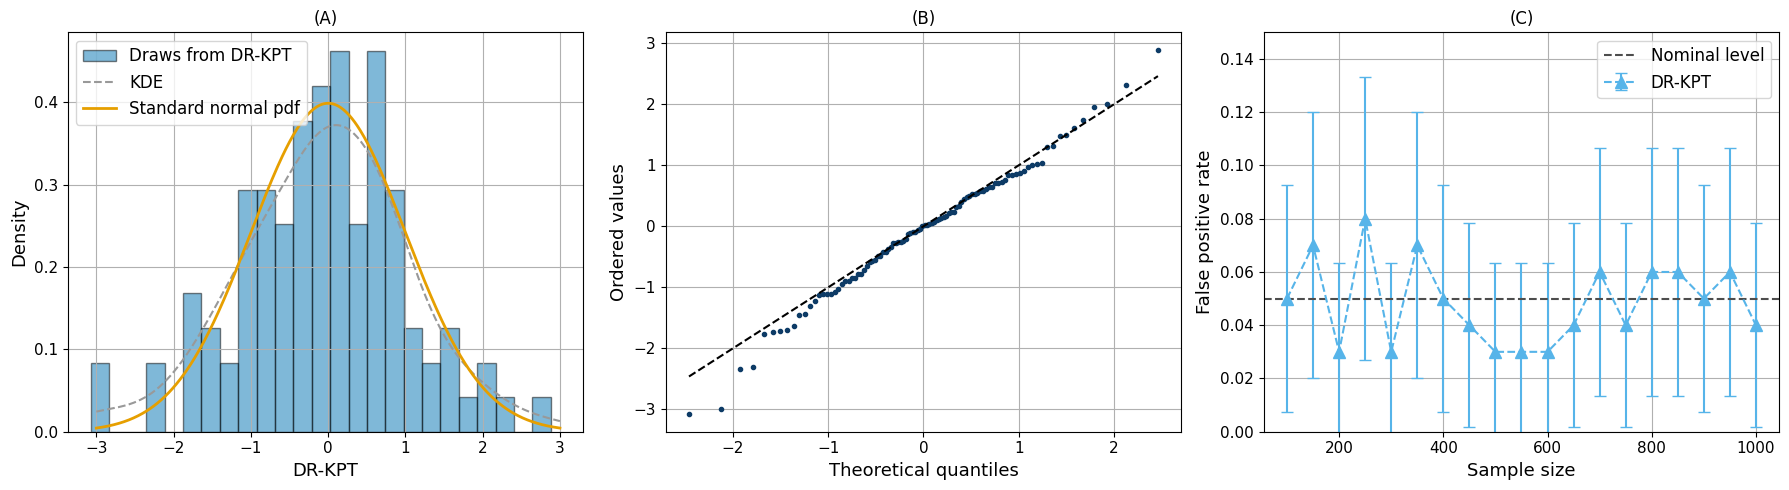

In [12]:
plot_null_diagnostics_observational(
    d_continuous,
    scenario="I",
    method="DR-CF",
    ns=400,
    name_folder="data/",
    ns_list=np.arange(100, 1050, 50),
    confidence_level=0.05,
    save_path="plots/null_continuous_scenarioI_errorbar.png"
)


In [23]:
# plot_null_diagnostics_observational(
#     d_binary,
#     scenario="I",
#     method="DR-CF",
#     ns=400,
#     name_folder="data/",
#     ns_list=sample_size_list,
#     confidence_level=0.05,
#     save_path="plots/null_binary_scenarioI_errorbar.png",
#     treatments='binary'
# )

In [13]:
# import numpy as np
# import matplotlib.pyplot as plt

# def plot_power_scenarios_observational(
#     d,
#     scenario_list=["II", "III", "IV"],
#     ns_list=[100, 150, 200, 250, 300, 350],
#     methods=["PE-linear", "KPE", "DR-CF"],
#     name_folder="data/",
#     confidence_level=0.05,
#     save_path="plots/scenarios234_errorbar.png",
#     treatments='continuous'
# ):
#     plt.rcParams["figure.figsize"] = (16, 4)
#     plt.rc("legend", fontsize=12)
#     plt.rc("axes", labelsize=15)
#     plt.rc("xtick", labelsize=15)

#     fig, axs = plt.subplots(1, 3, constrained_layout=True)

#     method_dict = {"DR": "DR", "KPE": "KPE", "DR-CF": "DR-CF", "PE-linear": "PE-linear"}
#     m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
#     scenario_titles = {"II": "(II)", "III": "(III)", "IV": "(IV)"}
#     ns_array = np.array(ns_list)

#     for col, scenario in enumerate(scenario_list):
#         ax = axs[col]
#         ax.set_title(scenario_titles[scenario])
#         ax.set_ylim((-0.05, 1.05))
#         ax.set_xlabel("Sample size")
#         ax.set_xticks(ns_list)
#         if col == 0:
#             ax.set_ylabel("True positive rate")

#         for i, method in enumerate(methods):
#             rejection_proportion = []
#             for ns in ns_list:
#                 fname = f"{name_folder}ns{ns}_treatments_{treatments}_scenario{scenario}_{method}.csv"
#                 pvals = d[fname]["p_value"]
#                 rej = (pvals < confidence_level).mean()
#                 rejection_proportion.append(rej)
#             rejection_proportion = np.array(rejection_proportion)
#             varhat = rejection_proportion * (1 - rejection_proportion) / len(pvals)
#             ax.errorbar(
#                 x=ns_array,
#                 y=rejection_proportion,
#                 yerr=1.96 * np.sqrt(varhat),
#                 capsize=5,
#                 label=method_dict[method],
#                 marker=m_dict[i],
#                 markersize=10
#             )
#         ax.legend(loc="lower left")
#     os.makedirs(os.path.dirname(save_path), exist_ok=True)
#     plt.savefig(save_path, bbox_inches="tight")
#     plt.show()

import numpy as np
import matplotlib.pyplot as plt
import os

def plot_power_scenarios_observational(
    d,
    scenario_list=["II", "III", "IV"],
    ns_list=[100, 150, 200, 250, 300, 350],
    methods=["PE-linear", "KPE", "DR-CF"],
    name_folder="data/",
    confidence_level=0.05,
    save_path="plots/scenarios234_errorbar.png",
    treatments='continuous'
):
    # === Styling ===
    plt.rcParams["figure.figsize"] = (16, 4)
    plt.rc("legend", fontsize=12)
    plt.rc("axes", labelsize=15)
    plt.rc("xtick", labelsize=15)
    plt.rc("ytick", labelsize=15)
    plt.rcParams["axes.grid"] = True

    fig, axs = plt.subplots(1, 3, constrained_layout=True)

    # === Mappings ===
    method_dict = {"DR": "DR", "KPE": "KPT", "DR-CF": "DR-KPT", "PE-linear": "PT-linear"}
    colors = {
        "PE-linear": "#E69F00",
        "KPE": "#0072B2",
        "DR-CF": "#009E73",
        "DR": "#56B4E9"
    }
    m_dict = {0: "^", 1: "s", 2: "v", 3: "o", 4: "D"}
    scenario_titles = {"II": "(II)", "III": "(III)", "IV": "(IV)"}
    ns_array = np.array(ns_list)

    for col, scenario in enumerate(scenario_list):
        ax = axs[col]
        ax.set_title(scenario_titles[scenario])
        ax.set_ylim((-0.05, 1.05))
        ax.set_xlabel("Sample size")
        ax.set_xticks(ns_list)
        ax.grid(True, linestyle="--", alpha=0.6)
        if col == 0:
            ax.set_ylabel("True positive rate")

        for i, method in enumerate(methods):
            rejection_proportion = []
            for ns in ns_list:
                fname = f"{name_folder}ns{ns}_treatments_{treatments}_scenario{scenario}_{method}.csv"
                pvals = d[fname]["p_value"]
                rej = (pvals < confidence_level).mean()
                rejection_proportion.append(rej)
            rejection_proportion = np.array(rejection_proportion)
            varhat = rejection_proportion * (1 - rejection_proportion) / len(pvals)
            ax.errorbar(
                x=ns_array,
                y=rejection_proportion,
                yerr=1.96 * np.sqrt(varhat),
                capsize=4,
                marker=m_dict[i],
                linestyle='--',
                linewidth=1.5,
                markersize=8,
                label=method_dict[method],
                color=colors.get(method, "#333333")
            )
        ax.axhline(confidence_level, color="black", linestyle=":", linewidth=1)
        ax.legend(loc="lower left")

    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, bbox_inches="tight")
    plt.show()



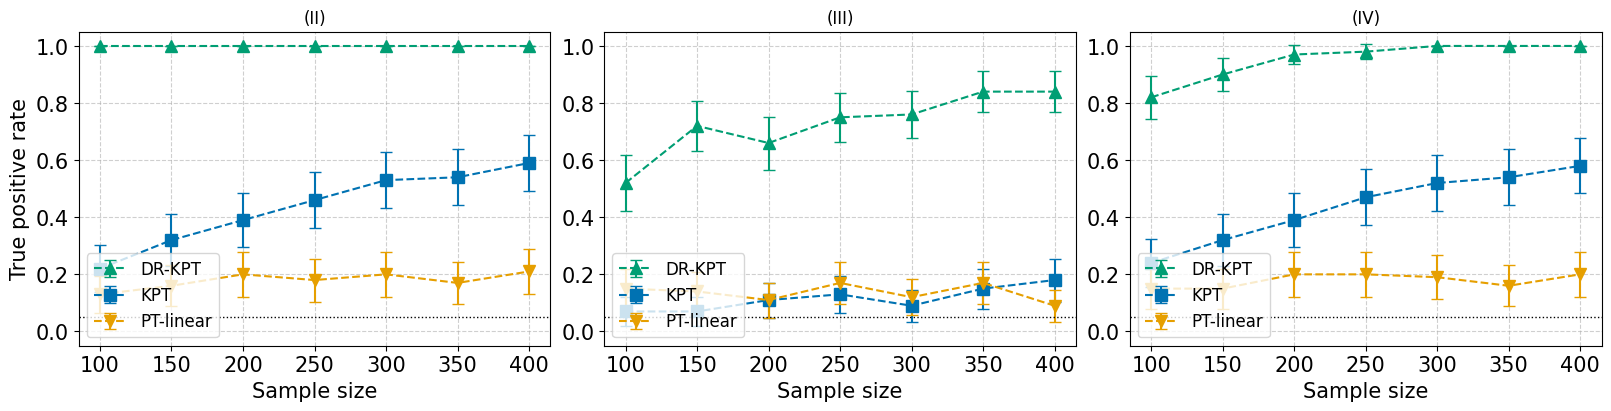

In [14]:
plot_power_scenarios_observational(
    d=d_continuous,  # your loaded results dictionary
    scenario_list=["II", "III", "IV"],
    ns_list=sample_size_list,
    methods=["DR-CF", "KPE", "PE-linear"],
    name_folder="data/",
    confidence_level=0.05,
    save_path="plots/continuous_scenarios234_errorbar.png"
)

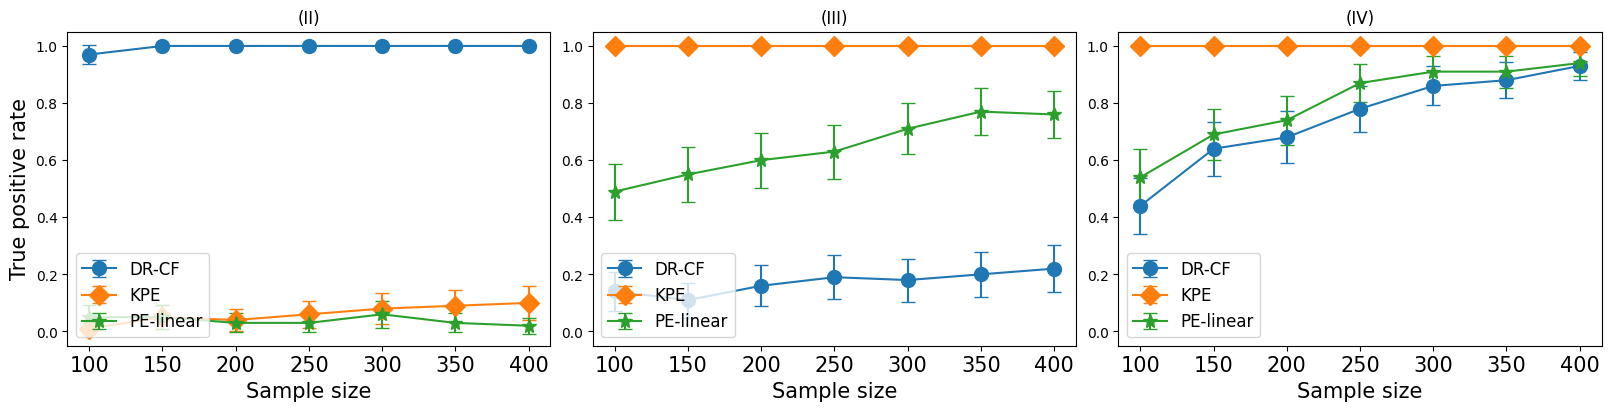

In [9]:
# plot_power_scenarios_observational(
#     d=d_binary,  # your loaded results dictionary
#     scenario_list=["II", "III", "IV"],
#     ns_list=sample_size_list,
#     methods=["DR-CF", "KPE", "PE-linear"],
#     name_folder="data/",
#     confidence_level=0.05,
#     save_path="plots/binary_scenarios234_errorbar.png",
#     treatments='binary'
# )